$$S = -\sum_{i=1}^{N}p_i \log_2{p_i},$$

<img src='1.png'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
balls = np.array(list('obbbboooobbbboooooob'))

p1 = (balls == 'o').mean()
p2 = (balls == 'b').mean()

S = -p1 * np.log2(p1) - p2 * np.log2(p2)
S

0.9927744539878083

<img src='2.png'>

In [13]:
balls = np.array(list('obbbboooobbbboooooob'))

thresh = 10
fold1 = balls[:thresh]
fold2 = balls[thresh:]

p11 = (fold1 == 'o').mean()
p12 = (fold1 == 'b').mean()
p21 = (fold2 == 'o').mean()
p22 = (fold2 == 'b').mean()

S1 = -p11 * np.log2(p11) - p12 * np.log2(p12)
S2 = -p21 * np.log2(p21) - p22 * np.log2(p22)

print(S1, S2)
print(np.mean([S1, S2]))

1.0 0.9709505944546686
0.9854752972273343


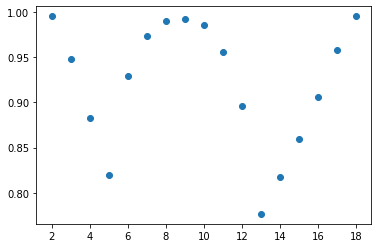

In [26]:
balls = np.array(list('obbbboooobbbboooooob'))

S = {}
for thresh in range(1, 19):
    fold1 = balls[:thresh]
    fold2 = balls[thresh:]
    
    p11 = (fold1 == 'o').mean()
    p12 = (fold1 == 'b').mean()
    p21 = (fold2 == 'o').mean()
    p22 = (fold2 == 'b').mean()
    
    if p11 * p12 == 0 or p21 * p22 == 0:
        continue
        
    S1 = -p11 * np.log2(p11) - p12 * np.log2(p12)
    S2 = -p21 * np.log2(p21) - p22 * np.log2(p22)

    mean = np.mean([S1, S2])
    S[thresh] = mean
    
    
plt.scatter(list(S.keys()), list(S.values()))

# Непосредственно деревья

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

feat_columns = iris.columns[:-1]
target_column = iris.columns[-1]

color_map = {species: i for i, species in enumerate(set(iris.species))}
color = iris.species.apply(color_map.get)

val_ratio = 0.15
# np.random.seed(25512)
train_rows = np.random.rand(iris.shape[0]) > val_ratio

X = iris[feat_columns]
y = iris['species']

X_train = iris[train_rows][feat_columns]
y_train = color[train_rows]

X_val = iris[~train_rows][feat_columns]
y_val = color[~train_rows]



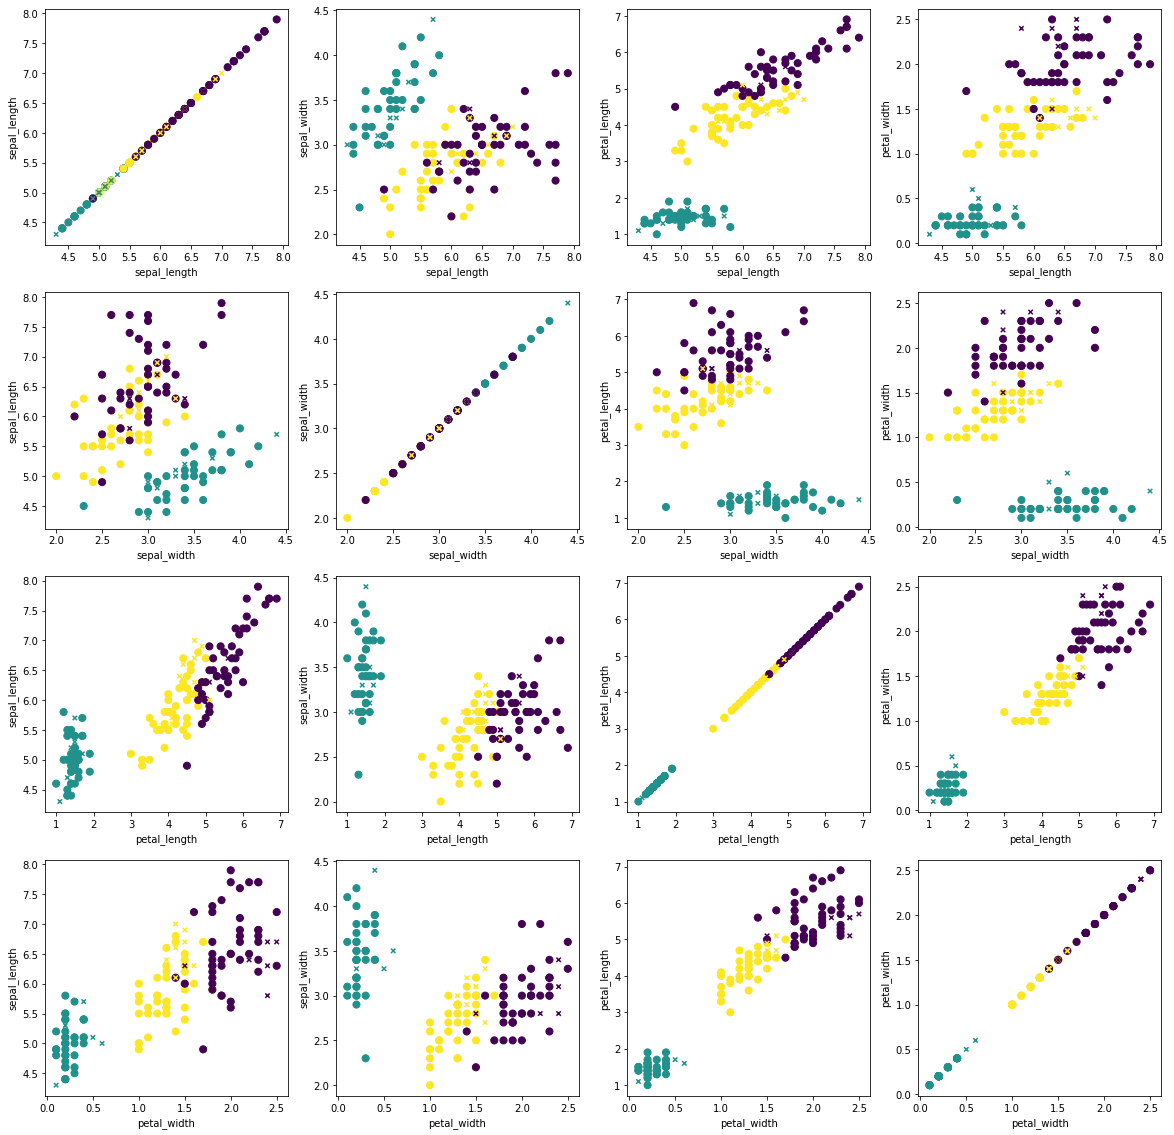

In [40]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
feat_columns = iris.columns[:-1]

for i, feat1 in enumerate(feat_columns):
    for j, feat2 in enumerate(feat_columns):
        for subset in 'train val'.split():
            if subset == 'train':
                X = X_train
                y = y_train
                marker = 'o'
                s = 50
                
            else:
                X = X_val
                y = y_val
                marker = 'x'
                s = 20
                
            x1 = X[feat1]
            x2 = X[feat2]

            ax = axes[i, j]

            ax.scatter(x1, x2, c=y, marker=marker, s=s)
            ax.set_xlabel(feat1)
            ax.set_ylabel(feat2)

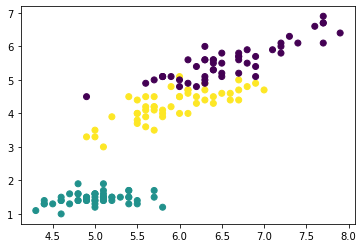

In [46]:
X = X[['sepal_length', 'petal_length']]

x1 = X.values[:, 0]
x2 = X.values[:, 1]

plt.scatter(x1, x2, c=color)

# Попытка выявить переобучение

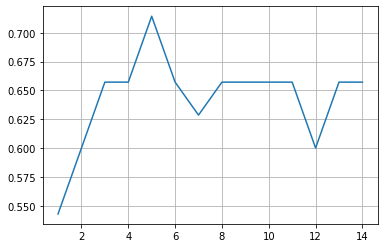

In [144]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

feat_columns = iris.columns[:-1]
target_column = iris.columns[-1]

color_map = {species: i for i, species in enumerate(set(iris.species))}
color = iris.species.apply(color_map.get)

val_ratio = 0.2

np.random.seed(25512)
train_rows = np.random.rand(iris.shape[0]) > val_ratio

feat_columns = ['sepal_length', 'sepal_width']
X = iris[feat_columns]
y = iris['species']

X_train = iris[train_rows][feat_columns]
y_train = color[train_rows]

X_val = iris[~train_rows][feat_columns]
y_val = color[~train_rows]

accs = {}
for depth in range(1, 15):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_val)
    acc = (pred == y_val).mean()
    
    accs[depth] = acc
    
plt.plot(list(accs.keys()), list(accs.values()))
plt.grid()

# Визуализации

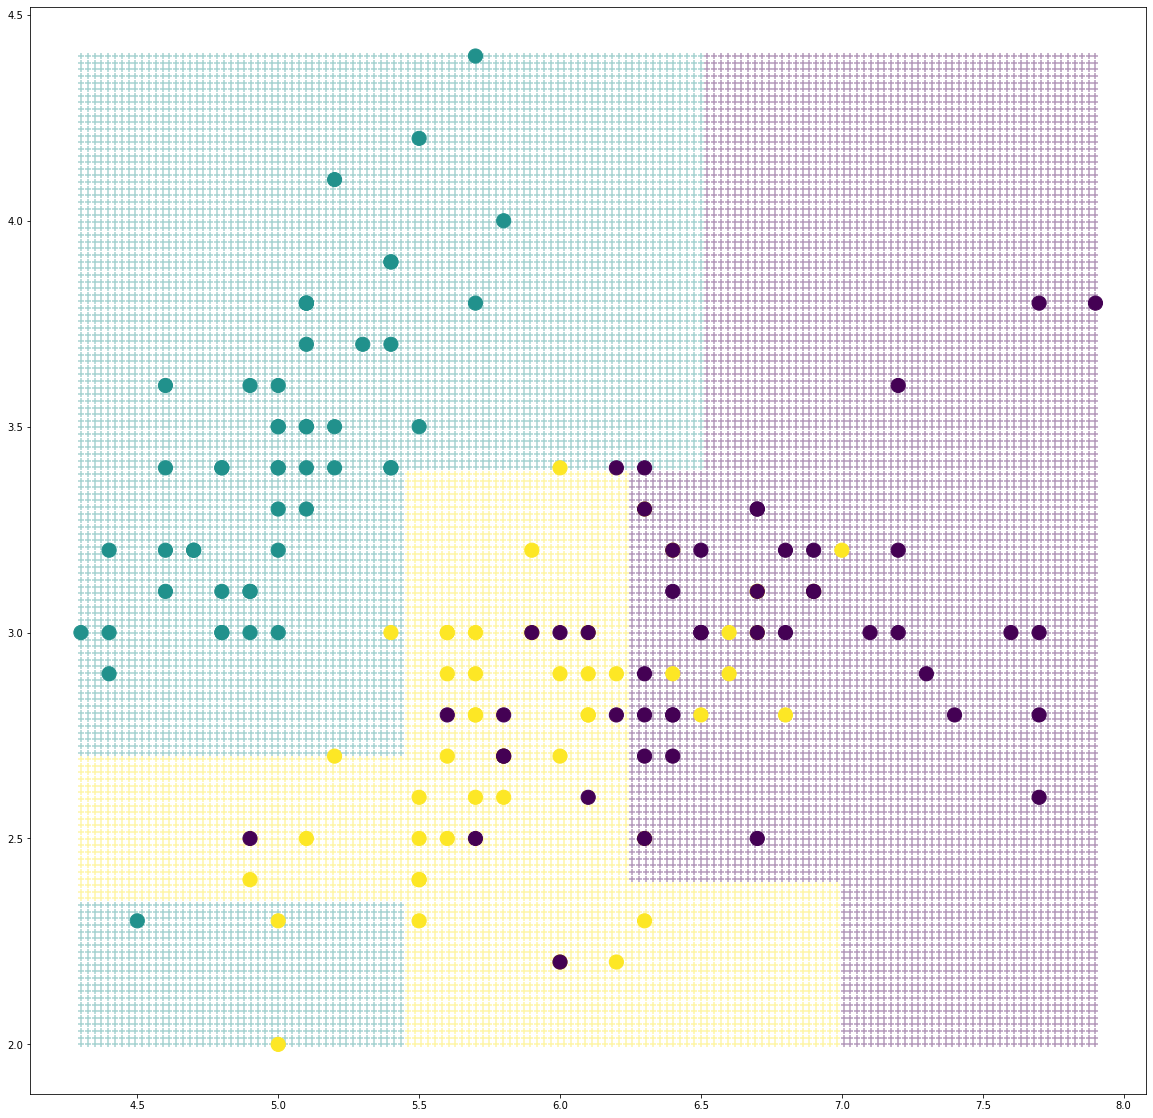

In [145]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, y_train)

pred = model.predict(X)

x1 = X.values[:, 0]
x2 = X.values[:, 1]

x1_scale = np.linspace(x1.min(), x1.max(), 150)
x2_scale = np.linspace(x2.min(), x2.max(), 150)

x1g, x2g = np.meshgrid(x1_scale, x2_scale)

x1r = x1g.reshape(-1, 1)
x2r = x2g.reshape(-1, 1)
X_grid = np.hstack([x1r, x2r])
grid_pred = model.predict(X_grid)

plt.figure(figsize=(20, 20))
plt.scatter(x1r, x2r, c=grid_pred, alpha=0.4, marker='+', vmin=0, vmax=2)
plt.scatter(x1, x2, c=color, s=200, vmin=0, vmax=2)

In [96]:
import graphviz
from sklearn import tree

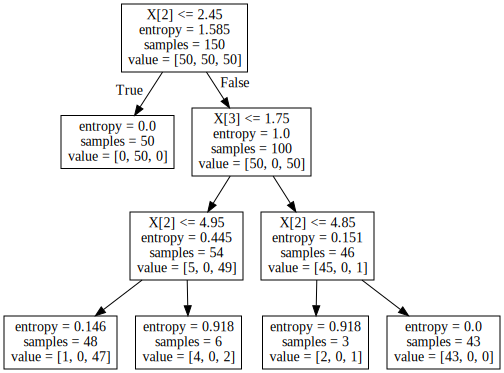

In [120]:
nodes = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(nodes)
graph